<center><img src="https://i2.wp.com/hackwagon.com/wp-content/uploads/2017/02/Logo-Web-Export.png?ssl=1" width=200/></center>
<h1> Hackwagon Academy DS102 Lesson 6A </h1>
<h2> Clustering </h2> 
<h3> Lesson Outline </h3>

- [K-Means Clustering Algorithm](#1)
- [Example - Spotify Songs](#2)
    - [Elbow Plot](#2.1)
- [Practice I - Credit Card Spending Behaviour](#P1)

<a id='1'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;</font><font color="salmon"> K-Means Clustering Algorithm </font> </h2></a>

- Start with k initial clusters (k needs to be pre-defined) 
- At every step, each record is reassigned to the cluster with the “closest” centroid
- Recompute the centroids of clusters that lost or gained a record, and repeat Step 2
- Stop when moving any more records between clusters increases cluster dispersion

<img src="https://i.imgur.com/VLNNMHE.png" width=400>

An animation can be found here: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/



<a id='2'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;</font><font color="salmon"> Example - Spotify Songs </font> </h2></a>

In [3]:
import pandas as pd 

df_spotify = pd.read_csv('spotify-30.csv')
df_spotify.head()


,id,name,artists,danceability,energy
0,6gBFPUFcJLzWGx4lenP6h,goosebumps,Travis Scott,0.841,0.728
1,6PCUP3dWmTjcTtXY02oFd,Castle on the Hill,Ed Sheeran,0.461,0.834
2,3eR23VReFzcdmS7TYCrhC,It Ain't Me (with Selena Gomez),Kygo,0.640,0.533
3,0tKcYR2II1VCQWT79i5Nr,Thunder,Imagine Dragons,0.600,0.810
4,6DNtNfH8hXkqOX1sjqmI7,Cold Water (feat. Justin Bieber & MØ),Major Lazer,0.608,0.798


### Visualise Dataset

Since the dataset is just 2 dimensions (i.e 2 variables), we can visualise how the songs are like in a scatter plot.

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)

# Scatter Plot for All Records Colored by Their Labels
df_spotify.plot(kind='scatter', x='danceability', 
               y='energy' , ax=ax1
              ,marker="o", s=120)

### Use Only Numerical Variables

The clustering algorithms can only work with numerical data, therefore, there is a need to filter to just the numerical columns, which are `danceability` and `energy`. 

In [5]:
df_spotify_cluster = df_spotify[['danceability', 'energy']]
df_spotify_cluster.head()

,danceability,energy
0,0.841,0.728
1,0.461,0.834
2,0.640,0.533
3,0.600,0.810
4,0.608,0.798


<a id='2.1'><h3>Elbow Plot</h3></a>

Text(0.5, 1.0, 'Elbow curve')

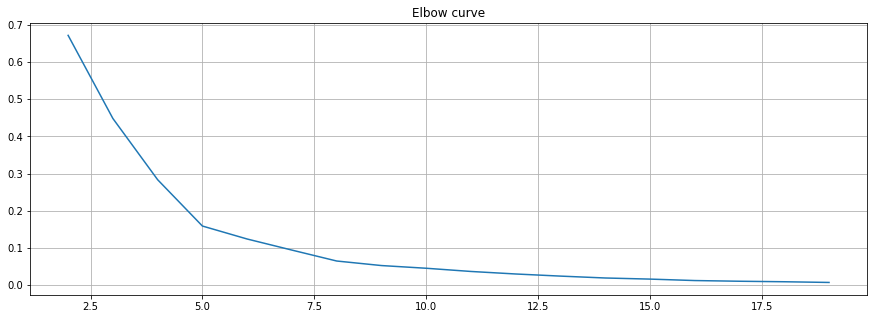

In [6]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = df_spotify_cluster # <<< Numerical DataFrame here
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

### Select K

Based on the above Elbow Plot, we can select an appropriate K. For this example, k will be <b>5</b>, therefore <b>5 clusters.</b>

In [7]:
k = 5
model = KMeans(n_clusters=k,  # < Initialise Number Of Clusters here
               random_state=0)

spotify_kmeans = model.fit(df_spotify_cluster) # < DataFrame of All Variables
print(spotify_kmeans)

KMeans(n_clusters=5, random_state=0)


### Getting Labels of Each Record

To retrieve the K-Means model's clusters, use `.labels_`, which gives a list of labels for the DataFrame. With the list of labels, we can create a new column and add it to the dataframe of `df_spotify`.

In [8]:
print('Each song\'s clusters:', spotify_kmeans.labels_)
df_spotify['label'] = spotify_kmeans.labels_
df_spotify.head()

Each song's clusters: [0 1 3 1 1 2 3 0 1 3 1 2 0 4 2 2 3 0 0 0 3 3 0 1 2 3 0 1 1 0]


,id,name,artists,danceability,energy,label
0,6gBFPUFcJLzWGx4lenP6h,goosebumps,Travis Scott,0.841,0.728,0
1,6PCUP3dWmTjcTtXY02oFd,Castle on the Hill,Ed Sheeran,0.461,0.834,1
2,3eR23VReFzcdmS7TYCrhC,It Ain't Me (with Selena Gomez),Kygo,0.640,0.533,3
3,0tKcYR2II1VCQWT79i5Nr,Thunder,Imagine Dragons,0.600,0.810,1
4,6DNtNfH8hXkqOX1sjqmI7,Cold Water (feat. Justin Bieber & MØ),Major Lazer,0.608,0.798,1


### Visualising The Clusters

After getting each record's cluster centers, we can now visualise them on a scatter plot. We will first get the centroids (center of the cluster) in a DataFrame. To get the cluster centers of the kmeans algorithm, use `.cluster_centers_`.

In [10]:
print(spotify_kmeans.cluster_centers_, end="\n")
centroids_df = pd.DataFrame(spotify_kmeans.cluster_centers_, 
                            columns=['danceability','energy'])
centroids_df['label'] = centroids_df.index
centroids_df

[[0.86366667 0.71611111]
 [0.5355     0.792875  ]
 [0.8352     0.4984    ]
 [0.61157143 0.57085714]
 [0.258      0.437     ]]


,danceability,energy,label
0,0.863667,0.716111,0
1,0.535500,0.792875,1
2,0.835200,0.498400,2
3,0.611571,0.570857,3
4,0.258000,0.437000,4


/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The colNu

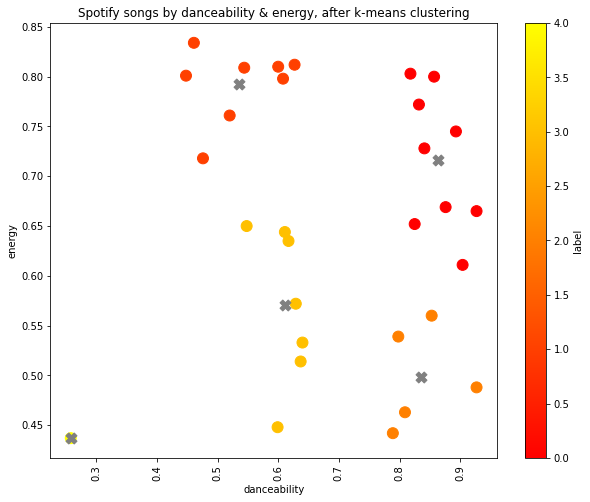

In [11]:
# Plot the results in a scatter plot, and add in the centroids
#
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)

# Scatter Plot for All Records Colored by Their Labels
df_spotify.plot(kind='scatter', x='danceability', 
               y='energy', c='label', colormap='autumn', ax=ax1
              ,marker="o", s=120)


# Scatter Plot for Centroids
centroids_df.plot(kind='scatter', x='danceability', 
               y='energy', color='gray', ax=ax1,
                marker="X", s=120,)

ax1.set_title("Spotify songs by danceability & energy, after k-means clustering")
plt.xticks(rotation=90)
plt.show()

### Predict 

Based on the existing clustering model, we can predict a new song and the clusters they belong to by using `kmeans.predict()`. This method takes in a `DataFrame`, as shown below.

In [12]:
X_P = pd.DataFrame([{'name' : 'Your Song',
                    'danceability' : 0.855,
                    'energy' : 0.624}])

display(X_P)

spotify_kmeans.predict(X_P[['danceability', 'energy']])

,danceability,energy,name
0,0.855,0.624,Your Song


array([0], dtype=int32)

<a id='P1'><h2> <img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Practice I </font><font color="skyblue"> * </font> - Credit Card Spending Behaviour</h2></a>

The following dataset is from [Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata) 

The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months, with 18 behavioral variables.

The Data Dictionary for this dataset is as such: 

<table>
    <tr>
    <th>Variable</th><th>Description</th>
    </tr>
    <tr>
    <td>CUST_ID</td><td>Identification of Credit Card holder (Categorical) </td>
    </tr>
    <tr>
    <td>BALANCE</td><td>Balance amount left in their account to make purchases</td>
    </tr>
    <tr>
    <td>BALANCE_FREQUENCY</td><td>How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)</td>
    </tr>
    <tr>
    <td>PURCHASES</td><td>Amount of purchases made from account</td>
    </tr>
    <tr>
    <td>ONEOFF_PURCHASES</td><td>Maximum purchase amount done in one-go</td>
    </tr>
    <tr>
    <td>INSTALLMENTS_PURCHASES</td><td>Amount of purchase done in installment</td>
    </tr>
    <tr>
    <td>CASH_ADVANCE</td><td>Cash in advance given by the user</td>
    </tr>
    <tr>
    <td>PURCHASES_FREQUENCY</td><td>How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)</td>
    </tr>
    <tr>
    <td>ONEOFF_PURCHASES_FREQUENCY</td><td>How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) </td>
    </tr>
    <tr>
    <td>PURCHASES_INSTALLMENTS_FREQUENCY</td><td>How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)</td>
    </tr>
    <tr>
    <td>CASH_ADVANCE_FREQUENCY</td><td>How frequently the cash in advance being paid</td>
    </tr>
    <tr>
    <td>CASH_ADVANCE_TRX</td><td>Number of Transactions made with "Cash in Advanced"</td>
    </tr>
    <tr>
    <td>PURCHASES_TRX</td><td>Number of purchase transactions made</td>
    </tr>
    <tr>
    <td>CREDIT_LIMIT</td><td>Limit of Credit Card for user</td>
    </tr>
    <tr>
    <td>PAYMENTS</td><td>Amount of Payment done by user</td>
    </tr>
    <tr>
    <td>MINIMUM_PAYMENTS</td><td>Minimum amount of payments made by user</td>
    </tr>
    <tr>
    <td>PRC_FULL_PAYMENT</td><td>Percent of full payment paid by user</td>
    </tr>
    <tr>
    <td>TENURE</td><td>Tenure of credit card service for user</td>
    </tr>
</table>

### Read Dataset

Using pandas, read the `CC GENERAL.csv` dataset as a DataFrame called `cc_df`.

In [13]:
import pandas as pd 

cc_df = pd.read_csv('CC_GENERAL.csv')
cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Fill NA

In the dataset, there are `NaN`, Not A Number, values and we need to replace these values with 0. 

<img src="https://i.imgur.com/Zy3qSM9.png" width=100>

Using `.fillna(0)`, remove these `NaN` values.

In [14]:
cc_df = cc_df.fillna(0)
cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Filter for Only Columns

Since K-Means only deals with numerical data, we need to filter out only the `CUST_ID` column and retain only the columns from `BALANCE` onwards. Rename this filtered DataFrame as `cc_df_cluster`. 

<img src="https://i.imgur.com/Q9J5iRC.png" width=400>

In [15]:
all_cols = list(cc_df.columns)
cc_df_cluster = cc_df[all_cols[1:]]
cc_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Plot the Elbow Plot and Select A _K_

Plot the elbow plot for 20 clusters and select an appropriate K for clustering. 

[279455041448.3495, 232943583149.99274, 206645785500.90442, 182259586254.5605, 162545447189.14008, 145383670747.16632, 132970869402.47989, 124270805030.6994, 116218452911.48538, 110823132105.36258, 102926593316.21878, 98155310480.1028, 95216000314.43048, 91346310822.91232, 88207472697.92303, 85305234334.30353, 82683980421.80919, 80017631507.2452]


Text(0.5, 1.0, 'Elbow curve')

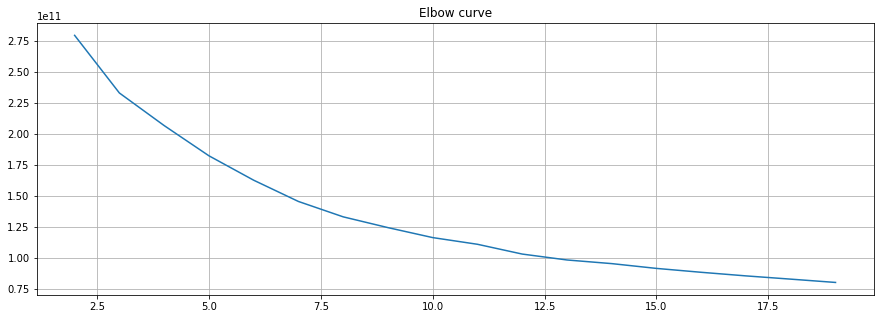

In [16]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = cc_df_cluster
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
print(distorsions)
plt.title('Elbow curve')

### Apply K-Means Algorithm

Using the selected `K`, apply the algorithm and store the kmeans model as `cc_kmeans`.

In [17]:
k = 10 # No right or wrong answer

model = KMeans(n_clusters=10, random_state=0)

cc_kmeans = model.fit(cc_df_cluster)

print(cc_kmeans)

KMeans(n_clusters=10, random_state=0)


### Tag Records with Cluster

After the K-means algorithm has been applied, tag each entry with their respective labels. This will identify each entry with a cluster. 

Create a new column called `cluster` using the values from your kmeans `.labels_`. 

In [18]:
cc_df['cluster'] = cc_kmeans.labels_

cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


### GroupBy the DataFrame 

Group up the DataFrame by it's cluster and use `.size()` to get number of records for each cluster.

In [19]:
cc_df_groupby = cc_df.groupby('cluster')
cc_df_groupby.size()

cluster
0    4928
1     302
2    1645
3      23
4     474
5     277
6     254
7     950
8      60
9      37
dtype: int64

### Save As CSV

Filter for Cluster `0` and save that cluster as a csv file called  `cluster_0_cc_data.csv`.

In [20]:
cluster_0 = cc_df[cc_df['cluster'] == 0]
cluster_0.to_csv('cluster_0_cc_data.csv')